# PR-22e-09 - Evaluation
### $G  = 0.90\,G_0$
### $\tau_i = \{???\}$

- 2023-10-21_MWIV_stripline_powers_maps_new_1_G0.hdf5
- 2023-10-24_HIV_new_1_G0_0.hdf5
- 2023-10-24_MWIV_stripline_powers_frequencies_new_1_G0.hdf5

In [1]:
# initialize stuff
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import importlib
import logging

import numpy as np
import matplotlib.pyplot as plt

sys.path.append("/Users/oliver/Documents/p5control-bluefors-evaluation")
sys.path.append("/home/oliver/Documents/p5control-bluefors-evaluation")

from utilities.baseclass import BaseClass
from utilities.baseevaluation import BaseEvaluation
from utilities.baseplot import BasePlot
from utilities.ivevaluation import IVEvaluation

importlib.reload(sys.modules["utilities.baseclass"])
importlib.reload(sys.modules["utilities.baseevaluation"])
importlib.reload(sys.modules["utilities.baseplot"])
importlib.reload(sys.modules["utilities.ivevaluation"])

import utilities.basefunctions
importlib.reload(sys.modules["utilities.basefunctions"])

from utilities.corporate_design_colors_v4 import cmap
importlib.reload(sys.modules["utilities.corporate_design_colors_v4"])

importlib.reload(logging)
logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO, format="%(message)s")
# pip install numpy matplotlib scipy tqdm torch hdf5view h5py PySide6

In [2]:
# Settings of Evaluation
from utilities.ivevaluation import IVEvaluation

importlib.reload(sys.modules["utilities.ivevaluation"])

eva = IVEvaluation()
eva.file_directory = "/Volumes/speedyboy/atomic-contact/"
eva.file_folder = "0.90 G_0/"
eva.setAmplifications(1000, 1000)
eva.setV(1.6e-3, voltage_bins=1600)
eva.setI(130e-9, current_bins=1300)
eva.downsample_frequency = 43

eva.file_name = "2023-10-21_MWIV_stripline_powers_maps_new_1_G0.hdf5"
eva.showMeasurements()
eva.file_name = "2023-10-24_HIV_new_1_G0_0.hdf5"
eva.showMeasurements()
eva.file_name = "2023-10-24_MWIV_stripline_powers_frequencies_new_1_G0.hdf5"
eva.showMeasurements()

(base) ... BaseClass initialized.
(base eva) ... BaseEvaluation initialized.
(iv eva) ... IVEvaluation initialized.
(base eva) Available measurements:
- "frequency_at_-25dBm"
(base eva) Available measurements:
- "critical field"
(base eva) Available measurements:
- "frequency_at_15GHz"


In [3]:
# Hard Evaluation

eva.sub_folder = "frequency study"
eva.file_name = "2023-10-21_MWIV_stripline_powers_maps_new_1_G0.hdf5"

eva.eva_temperature = True
eva.title = "Frequency Study (0.02V, Stripline)"
eva.setMeasurement("frequency_at_-25dBm")
eva.setKeys(index_0=3, index_1=-3, norm=1e9)
(eva.up_sweep,) = eva.getMaps([1])
eva.saveData()

eva.sub_folder = "amplitude study"
eva.file_name = "2023-10-24_MWIV_stripline_powers_frequencies_new_1_G0.hdf5"
eva.eva_temperature = False

eva.title = "Amplitude Study (15GHz, Stripline)"
eva.setMeasurement("frequency_at_15GHz")
eva.setKeys(index_0=3, index_1=-3, norm=1)
eva.addKey("nu=-31.0dBm", -1000)
(eva.up_sweep,) = eva.getMaps([1])
eva.setA(0, 0.09, 90)
(eva.up_sweep,) = eva.getMapsAmplitude([eva.up_sweep])
eva.y_axis = eva.amplitude_axis
eva.saveData()

eva.sub_folder = "magnetic field study"
eva.file_name = "2023-10-24_HIV_new_1_G0_0.hdf5"
eva.eva_temperature = False

eva.title = "Magnetic Field Study"
eva.setMeasurement("critical field")
eva.setKeys(index_0=3, index_1=-2, norm=1e-3)
(eva.up_sweep,) = eva.getMaps([1])
eva.saveData()

(base) Frequency Study (0.02V, Stripline)
(iv eva) getBackupTemperature()
100%|██████████| 201/201 [00:06<00:00, 30.51it/s]
(base) saveData()
(base) Amplitude Study (15GHz, Stripline)
100%|██████████| 23/23 [00:00<00:00, 24.05it/s]
/Users/oliver/Documents/p5control-bluefors-evaluation/utilities/ivevaluation.py:790: RuntimeWarning: Mean of empty slice
  dictionary["temperature"] = np.nanmean(
/Users/oliver/Documents/p5control-bluefors-evaluation/utilities/ivevaluation.py:801: RuntimeWarning: Mean of empty slice
  dictionary["temperature"] = np.nanmean(
(iv eva) getMapsAmplitude()
(base) saveData()
(base) Magnetic Field Study
100%|██████████| 241/241 [00:08<00:00, 27.16it/s]
(base) saveData()


(base) ... BaseClass initialized.
(base eva) ... BaseEvaluation initialized.
(iv eva) ... IVEvaluation initialized.
(base) ... BaseClass initialized.
(base plot) ... BasePlot initialized.
(iv plot) ... IVPlot initialized.
(iv plot) smoothing = False
(iv plot) window_length = 5
(base) Frequency Study (0.02V, Stripline)
(base) loadData()
(base plot) saveFigure()
(base plot) saveFigure()
(base) Amplitude Study (15GHz, Stripline)
(base) loadData()
(base plot) saveFigure()
(base plot) saveFigure()
(base) Magnetic Field Study
(base) loadData()
(base plot) saveFigure()
(base plot) saveFigure()


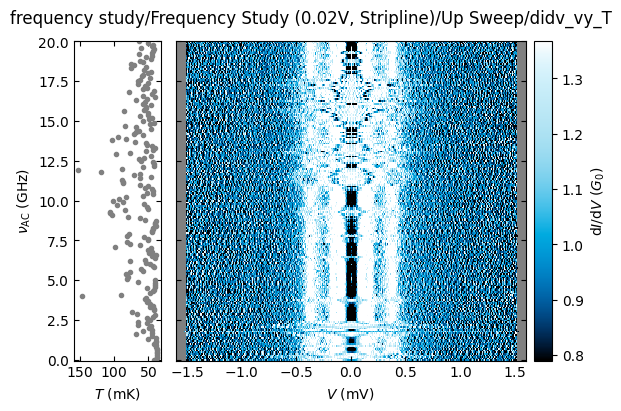

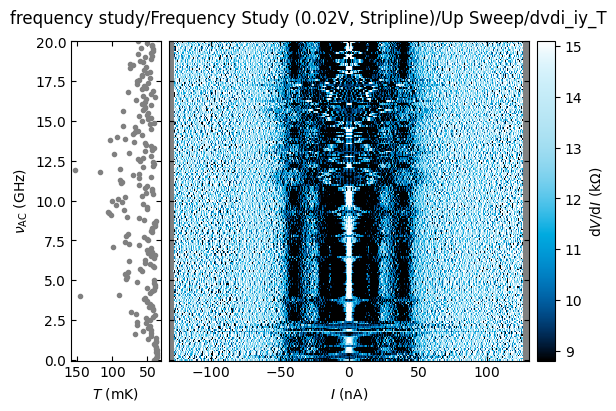

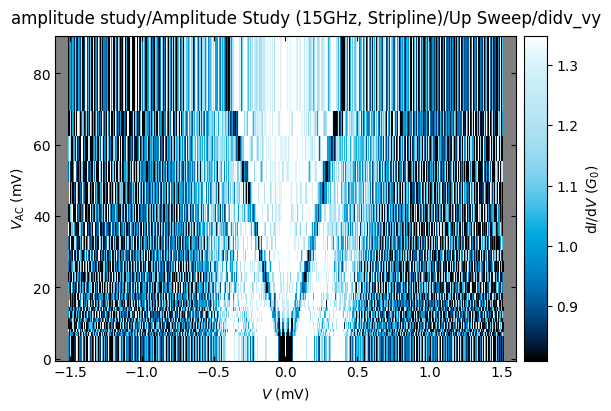

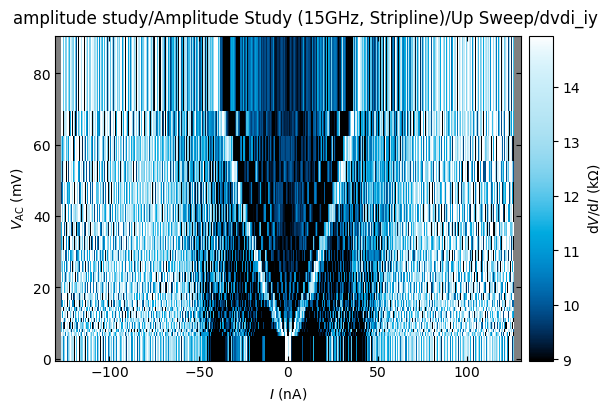

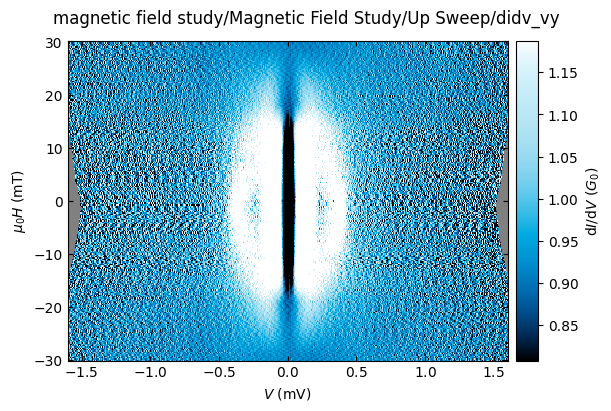

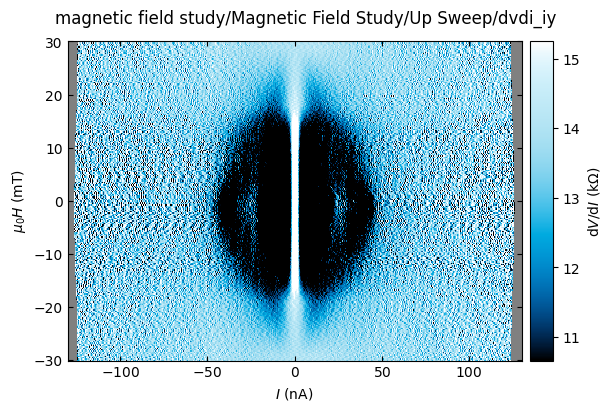

In [4]:
# Execute All IVPlotting
%matplotlib inline
from utilities.ivplot import IVPlot
importlib.reload(sys.modules["utilities.ivplot"])

eva = IVPlot()
eva.smoothing = False
eva.window_length = 5
eva.title_of_plot = "Up Sweep"

eva.plot_T = True

eva.title = "Frequency Study (0.02V, Stripline)"
eva.sub_folder = "frequency study"
eva.y_characters = [r"$\nu_\mathrm{AC}$", "Hz"]
eva.loadData()
eva.to_plot = eva.up_sweep
eva.plot_all()

eva.plot_T = False

eva.title = "Amplitude Study (15GHz, Stripline)"
eva.sub_folder = "amplitude study"
eva.y_characters = [r"$V_\mathrm{AC}$", "V"]
eva.loadData()
eva.to_plot = eva.up_sweep
eva.plot_all()

eva.plot_T = False

eva.title = "Magnetic Field Study"
eva.sub_folder = "magnetic field study"
eva.y_characters = [r"$\mu_0H$", "T"]
eva.loadData()
eva.to_plot = eva.up_sweep
eva.plot_all()